In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pydot
import numpy as np

In [2]:

(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train=np.expand_dims(x_train,-1)#由于要卷积，需要增加一个信道，在最后一个维度增加1 （系统默认）
x_test=np.expand_dims(x_test,-1)

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
x_train=tf.cast(x_train,tf.float32)/255 #由于图像像素是0-255的值，归一化需要将他们放到0-1这个范围内
x_test=tf.cast(x_test,tf.float32)/255

In [8]:
factor=0.5 #噪声系数

In [9]:
x_train_noise=x_train+factor*np.random.normal(size=x_train.shape)# 需要和x_train形状相同,但是带来了问题，所有像素点都在0-1范围，
#这样处理会让很多像素点超出1

In [10]:
x_train_noise.shape

TensorShape([60000, 28, 28, 1])

In [11]:
x_test_noise=x_test+factor*np.random.normal(size=x_test.shape)# 需要和x_test形状相同

In [12]:
x_test_noise.shape

TensorShape([10000, 28, 28, 1])

In [13]:
x_train_noise=np.clip(x_train_noise,0.,1.)# 最小值0，最大值1，因为是float 所以0.，1.
x_test_noise=np.clip(x_test_noise,0.,1.)# 最小值0，最大值1，因为是float 所以0.，1.

In [14]:
x_train_noise.shape,x_test_noise.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

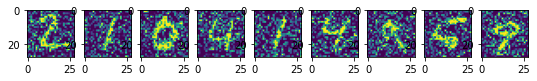

In [15]:
n=10
plt.figure(figsize=(10,2))
for i in range(1,n):
    plt.subplot(1,n,i)#1行子图
    plt.imshow(x_test_noise[i].reshape(28,28))# 之前是784 reshape成28x28
    

In [16]:
input_size=784
hidden_size=32
output_size=784

In [17]:
#https://zhuanlan.zhihu.com/p/77471866
#https://blog.csdn.net/xys430381_1/article/details/82529397

In [18]:
input=tf.keras.layers.Input(shape=x_train.shape[1:])#其实就是把60000X28X28X1变成28x28x1
#encode
x=tf.keras.layers.Conv2D(16,3,activation='relu',padding='same')(input)#16个卷积核（feature maps 16层） 3x3每个卷积核的大小
#padding=same 就是保持原有图像大小，用0填充 28X28X16
x=tf.keras.layers.MaxPooling2D(padding='same')(x)# 默认POOL SIZE 2x2 也就是说缩小一倍 14X14X16
x=tf.keras.layers.Conv2D(32,3,activation='relu',padding='same')(x)#14x14x32
x=tf.keras.layers.MaxPooling2D(padding='same')(x)#7x7x32
#decode (上采样)
x=tf.keras.layers.Conv2DTranspose(16,3,strides=2,activation='relu',padding='same')(x)#上采样，strides=2 就是放大一倍，
#padding='same'还原到原来图像一样大小 14x14x16
x=tf.keras.layers.Conv2DTranspose(1,3,strides=2,activation='sigmoid',padding='same')(x)#上采样，输入的图像是28x28x1 所以 这里 1
#结果是28x28x1,由于归一化，sigmoid
model=tf.keras.Model(inputs=input,outputs=x)


In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145   

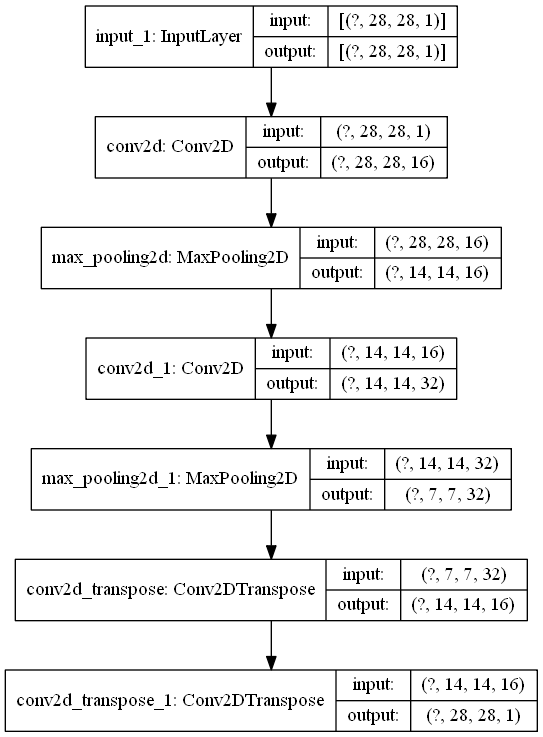

In [20]:
tf.keras.utils.plot_model(model,show_shapes=True)# 画出模型结构

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
loss='mse'#mean squre error learning rate 0.001输入输出误差越小越好
)

In [22]:
model.fit(x_train_noise,x_train,
          epochs=50,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noise,x_test)
         )#由于自编码 输入输出一样，故x_train,x_train
#输入是噪声，输出是完好

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1007 - val_loss: 0.0438
Epoch 2/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0295 - val_loss: 0.0222
Epoch 3/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0210 - val_loss: 0.0195
Epoch 4/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0191 - val_loss: 0.0181
Epoch 5/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0180 - val_loss: 0.0173
Epoch 6/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0172 - val_loss: 0.0167
Epoch 7/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0166 - val_loss: 0.0161
Epoch 8/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0162 - val_loss: 0.0157
Epoch 9/50
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0158 - val_

In [23]:
pre_test=model.predict(x_test_noise)

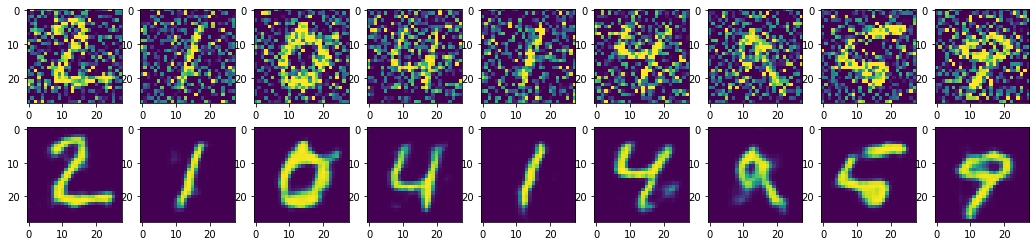

In [24]:
plt.figure(figsize=(20,4))
for i in range(1,n):
    ax=plt.subplot(2,n,i)#画两个子图
    plt.imshow(x_test_noise[i].reshape(28,28))# 之前是784 reshape成28x28
    ax=plt.subplot(2,n,i+n)# 2列一行n个从第n+1开始第二列
    plt.imshow(pre_test[i].reshape(28,28))